# Importing the libraries and Datasets

In [3]:
import pandas as pd
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [4]:
# Import the train and test datasets
train_df = pd.read_csv('Train_Bank_Churn_Dataset.csv')
test_df = pd.read_csv('Test_Bank_Churn_Dataset.csv')

In [5]:
# Split them
X_train = train_df.drop('Exited', axis='columns')
X_test = test_df.drop('Exited', axis='columns')
y_train = train_df['Exited']
y_test = test_df['Exited']


### Initial Benchmark with ANN

In [6]:
model = keras.Sequential([keras.layers.Dense(25, input_shape=(12,), activation='relu'), # start with 12 input layers for 12 columns and 20 hidden layers
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(15, activation='relu'), # Additional hidden layer
                          keras.layers.Dense(1, activation='sigmoid') # output layer
                          ])

In [7]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)


Epoch 1/50


250/250 [==============================] - 1s 1ms/step - loss: 0.4645 - accuracy: 0.8018
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.8307
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.8451
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.8553
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.8569
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3411 - accuracy: 0.8609
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8616
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8618
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8621
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.8

In [8]:
model.evaluate(X_test,y_test)
y_pre = model.predict(X_test)
y_pred = []
for element in y_pre:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

63/63 [==============================] - 0s 1ms/step - loss: 0.3587 - accuracy: 0.8555


[0.3586728572845459, 0.8554999828338623]

In [11]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1578
           1       0.70      0.55      0.62       422

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



Text(50.722222222222214, 0.5, 'Truth')

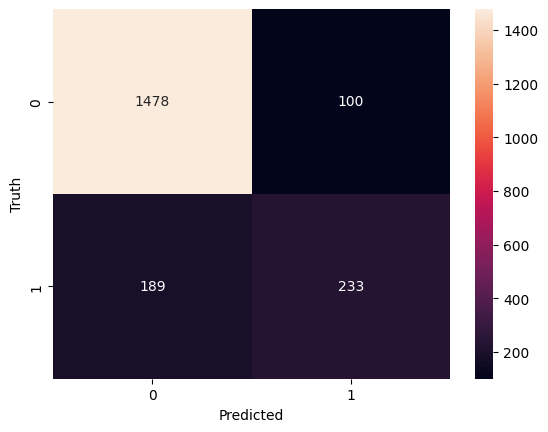

In [14]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Summary

While the accuracy, precision and recall for when the customers are actually staying with bank are high with 0.86. 0.89, and 0.94 respectively, the model falls short in correctly predicting when the customers are churning with precision, recall and f1-score of 0.70, 0.55, and 0.62.

More layers and hypertuning can be done to make the model's predictions more accurate.

### (Below) Experimentation With AdamW Optimizer with more layers and neurons

Results are similar to the benchmark with just as poor f1-score for predicting churn and similar accuracy rating.

In [27]:
model = keras.Sequential([keras.layers.Dense(50, input_shape=(12,), activation='relu'), # start with 12 input layers for 12 columns and 20 hidden layers
                          keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(15, activation='relu'), 
                          keras.layers.Dense(1, activation='sigmoid') # output layer
                          ])


model.compile(optimizer=keras.optimizers.AdamW(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15)

model.evaluate(X_test,y_test)
y_pre = model.predict(X_test)
y_pred = []
for element in y_pre:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Epoch 1/15
250/250 [==============================] - 1s 953us/step - loss: 0.4567 - accuracy: 0.8044
Epoch 2/15
250/250 [==============================] - 0s 988us/step - loss: 0.3628 - accuracy: 0.8478
Epoch 3/15
250/250 [==============================] - 0s 920us/step - loss: 0.3466 - accuracy: 0.8561
Epoch 4/15
250/250 [==============================] - 0s 895us/step - loss: 0.3374 - accuracy: 0.8609
Epoch 5/15
250/250 [==============================] - 0s 935us/step - loss: 0.3341 - accuracy: 0.8627
Epoch 6/15
250/250 [==============================] - 0s 935us/step - loss: 0.3304 - accuracy: 0.8636
Epoch 7/15
250/250 [==============================] - 0s 950us/step - loss: 0.3267 - accuracy: 0.8652
Epoch 8/15
250/250 [==============================] - 0s 899us/step - loss: 0.3243 - accuracy: 0.8671
Epoch 9/15
250/250 [==============================] - 0s 904us/step - loss: 0.3199 - accuracy: 0.8684
Epoch 10/15
250/250 [==============================] - 0s 866us/step - loss: 0.317

In [29]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1578
           1       0.73      0.51      0.60       422

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



Text(50.722222222222214, 0.5, 'Truth')

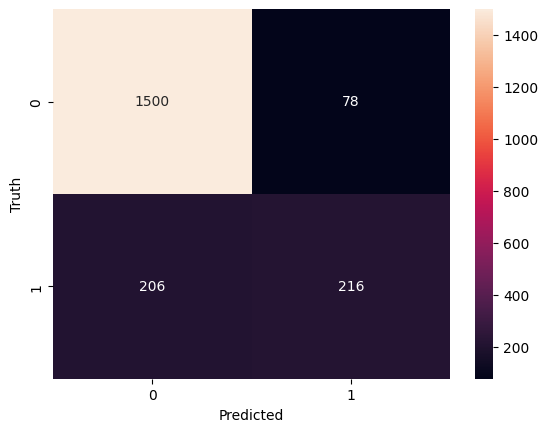

In [30]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')